# Decision Tree Model - EDP
### Author - Charvi Jain and Shaurya Singh Srinet 

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

### Defining batch size and generating training dataset

In [27]:
# Define the base directory where your dataset is located
base_directory = r"C:\Users\Charvi Jain\Downloads\dataset"

# Define the image size and batch size
image_size = (224, 224)
batch_size = 64

# Generating train dataset
train_data = tf.keras.utils.image_dataset_from_directory(
    directory=base_directory,
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True,
    seed=2022
)


Found 4217 files belonging to 4 classes.


### Data Distribution

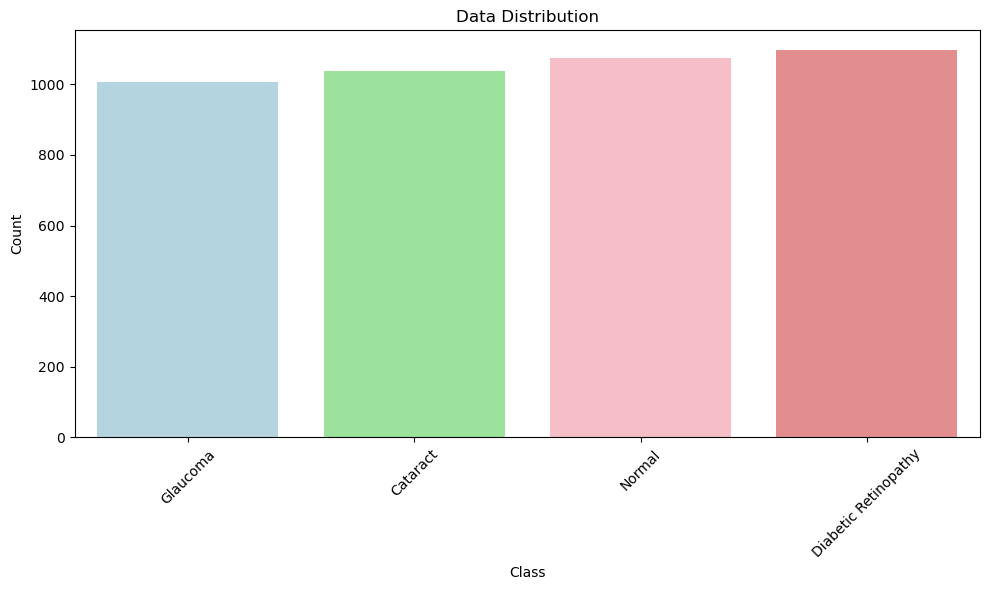

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get class names and counts
class_names = ["Glaucoma", "Cataract", "Normal", "Diabetic Retinopathy"]
class_counts = [1007, 1038, 1074, 1098]

# Define pastel colors for the bars
colors = ["lightblue", "lightgreen", "lightpink", "lightcoral"]

# Set a larger figure size to make the graph fit within the display area
plt.figure(figsize=(10, 6))  # Adjust width and height as needed

# Create the data distribution bar graph with pastel colors
sns.barplot(x=class_names, y=class_counts, palette=colors)

# Customize the plot
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Data Distribution')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()  # Ensures that everything fits within the display area
plt.show()


### Preprocessing the images and extracting labels from subdirectory

In [20]:
# Initialize lists to store image data and labels
image_data = []
labels = []

# Iterate through the subdirectories
for label in os.listdir(base_directory):
    label_path = os.path.join(base_directory, label)
    if os.path.isdir(label_path):
        for image_file in os.listdir(label_path):
            if image_file.endswith('.jpg'):
                image_path = os.path.join(label_path, image_file)

                # Preprocess the image (e.g., resize, normalize, convert to grayscale)
                image = cv2.imread(image_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                image = cv2.resize(image, (128, 128))  # Adjust the size as needed
                image = image / 255.0  # Normalize pixel values

                image_data.append(image)

                # Extract the label from the subdirectory name and add it to the labels list
                labels.append(label)


In [21]:
X = np.array(image_data)
y = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Flatten the images
X_train_flat = X_train.reshape(X_train.shape[0], -1)

### # Create a Decision Tree classifier and training it on training data

In [22]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_flat, y_train)

DecisionTreeClassifier(random_state=42)

### Flatten The images and make predictions on test data

In [23]:
X_test_flat = X_test.reshape(X_test.shape[0], -1)
y_pred = clf.predict(X_test_flat)

### Calculation the accuracy of the model

In [24]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.565068493150685


### Generating Classification Report

In [26]:
from sklearn.metrics import classification_report

# Calculate the unique classes in y_test and y_pred
unique_classes_test = np.unique(y_test)
unique_classes_pred = np.unique(y_pred)

# Create a union of unique classes to ensure consistency
all_unique_classes = np.union1d(unique_classes_test, unique_classes_pred)

# Generate a classification report with the updated class labels
report = classification_report(y_test, y_pred, labels=all_unique_classes, target_names=class_names)

# Print the classification report
print(report)


                      precision    recall  f1-score   support

            Glaucoma       0.56      0.51      0.53       199
            Cataract       0.47      0.57      0.51       169
              Normal       0.67      0.62      0.64       216

            accuracy                           0.57       584
           macro avg       0.57      0.56      0.56       584
        weighted avg       0.57      0.57      0.57       584



C:\Users\Charvi Jain\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2561: UserWarning: labels size, 3, does not match size of target_names, 4
  warnings.warn(
